## Naive Bayes Classifier  
---  

- It is supervised learning algorithm used for classification based on Bayes' Theorem  

- NBC is not just an algorithm, but a collection of many algorithms that work on the same concept, the Bayes' Theorem  

### Industrial Use of Naive Bayes Classifier  

- News Categorization  
- Spam filtering   
- Object and face recognition.  
- Medical Diagnosis   
- Weather Prediction etc..  

### Type of Naive Bayes Classifier   

We have three type of naive bayes classifier 

- Gaussian  
- Multinomial   
- Bernoulli 

## Bayes' Theorem  

NBS works only on the bass theorem. Let's see what the bass theorem is.

                                            P(H/E) =  P(E/H) P(H)/P(E)

H- Hypothesis  , E-Event / Evidence  

Bayes' Theorem works on conditional probability  
We have been given that if the event has happened or the event is true, then we have to calculate the probability of Hypothesis on this event.  
Means the chances of happening H when the event E is happened.  

- P(H) - It is said priori (A prior probability), Probability of H before E is happen.  

- P(H/E) - Posterior probability, Probability of E  after event E is true.

Note: As our question is, we have implement a naive bayes classifier on .csv file,Here we will use the naive  bayes classifier on wine data-set.

### Wine Dataset Description
The wine dataset contains the results of a chemical analysis of wines grown in a specific area of Italy  

It contains total 178 samples (data), with 13 chemical analysis (features) recorded for each sample.  

And contains three classes (our target), with no missing values.  

### Implementation of Algorithm


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
wine=load_wine()

In [3]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:

wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:

wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
df=pd.DataFrame(wine.data)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
df.columns=wine.feature_names

In [11]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [12]:
df.shape

(178, 13)

In [13]:
x=df
y=wine.target

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [19]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [20]:
ypred=gnb.predict(xtest)

In [21]:
ypred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [22]:
ytest

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2])

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]], dtype=int64)

<AxesSubplot:>

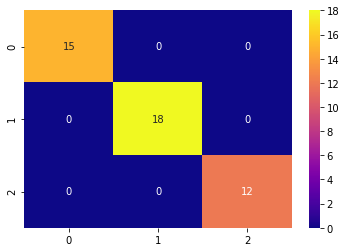

In [26]:
sns.heatmap(cm,annot=True,cmap='plasma')

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

1.0


# Classification  with  Multinomial Naive Bayes

#### Note: Now we will see how to use NBS in text classification for this it is necessary to understand our process first

Actually what we do is we first train the model with the data that we have already, In the case of text, we have a data-set in which the texts are already in some defined categories.
After that we will take any new text and find out which category it belongs to.
Let's understand it with an example 


Import Data-set  

- The dataset that we are going to use here is Fetch_20 Newsgroups dataset.  
- You can load the dataset in 2 ways, either directly upload from sklearn or you can download it.  
- There are 2 folders in it, the first folder is of our train dataset, the second folder is of our test dataset.  
- There are many categories in this data, but here we will take only a few categories which are given in the code below in categories variable.


In [1]:
from sklearn.datasets import fetch_20newsgroups


In [2]:
news=fetch_20newsgroups()

In [ ]:
news.keys